In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv('Iris.csv')
data.drop('Id',axis=1,inplace=True)
#Iris-setosa  Iris-versicolor  Iris-virginica
data.drop_duplicates(inplace=True)
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data=data[data['Species']!=2]
#data.info

In [60]:
class LogistRegression:
    def __init__(self,alpha,times):
        self.alpha=alpha
        self.times=times
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        self.w=np.zeros(1+X.shape[1])
        self.loss=[]
        for i in range(self.times):
            z=np.dot(X,self.w[1:])+self.w[0]
            p=self.sigmoid(z)
            cost=-np.sum(y*np.log(p)+(1-y)*np.log(1-p))
            self.loss.append(cost)
            self.w[0]+=self.alpha*np.sum(y-p)
            self.w[1:]+=self.alpha*np.dot(X.T,(y-p))
    def predict_pro(self,X):
        X=np.asarray(X)
        z=np.dot(X,self.w[1:])+self.w[0]
        p=self.sigmoid(z)
        p=p.reshape(-1,1)
        return np.concatenate([1-p,p],axis=1)
    def predict(self,X):
        return np.argmax(self.predict_pro(X),axis=1)
            
            

In [65]:
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:70,:-1]
train_y=t.iloc[:70,-1]
test_X=t.iloc[70:,:-1]
test_y=t.iloc[70:,-1]

lg=LogistRegression(alpha=0.01,times=20)
lg.fit(train_X,train_y)
#lg.predict_pro(test_X)
result=lg.predict(test_X)
#display(r)
display(np.sum(result==test_y)/len(test_y))

1.0

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

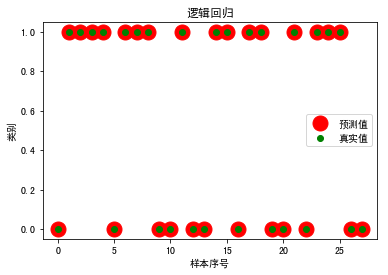

In [67]:
# 绘制预测值
plt.plot(result, "ro", ms=15, label="预测值")
# 绘制真实值
plt.plot(test_y.values, "go", label="真实值")
plt.title("逻辑回归")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()

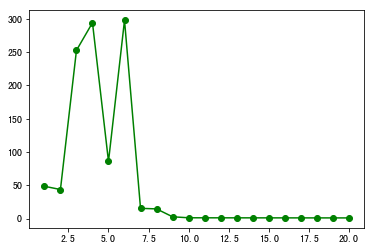

In [68]:


# 绘制目标函数的损失值
plt.plot(range(1, lg.times + 1),lg.loss, "go-")